In [228]:
def plotLatency(val, fileName, clk_MHz) :
    #val = (data.endComputing-data.beginComputing)

    n, bins, patches = plt.hist( ( val * 1/clk_MHz ), 14)
    mean = val.mean()
    sigma = val.std()

    plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.4f \mu s$' % (mean*1/clk_MHz) )
    plt.xlabel('Latency ($\mu$s)')
    #plt.axis([60, 160, 0, 1])
    plt.savefig(fileName, dpi=300)

    plt.show()

In [250]:
import pandas
import matplotlib.pyplot as plt

In [277]:
dataSet = '1seed'

data = pandas.read_csv('/home/vpalladi/FW/MP7/cactusupgrades/projects/hgc/sim/'+dataSet+'/latency/latency_0.csv')
clk_MHz = 320


In [278]:
data.head()

,fileName,sAcquired,beginComputing,endComputing,beginSend,endSend
0,outR_0.mp7,10,105,118,120,146
1,outR_100.mp7,10,113,124,126,152
2,outR_101.mp7,10,111,124,126,152
3,outR_102.mp7,10,113,124,126,152
4,outR_103.mp7,10,61,70,72,98


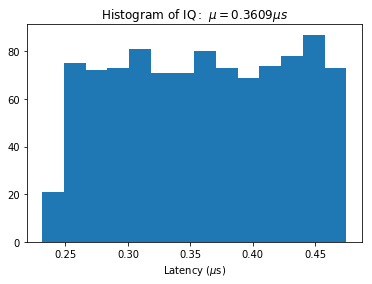

In [285]:

val = data.endSend


plotLatency(val, '/home/vpalladi/Desktop/CMS/PICS/latency/latency_'+dataSet+'_'+str(clk_MHz)+'MHz.png', clk_MHz)

plt.show()


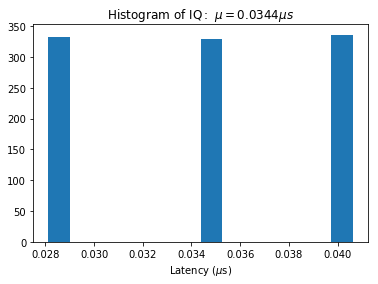

In [286]:
val = (data.endComputing-data.beginComputing)
plotLatency( val, '/home/vpalladi/Desktop/CMS/PICS/latency/latencyComputing_'+dataSet+'_'+str(clk_MHz)+'MHz.png', clk_MHz ) 

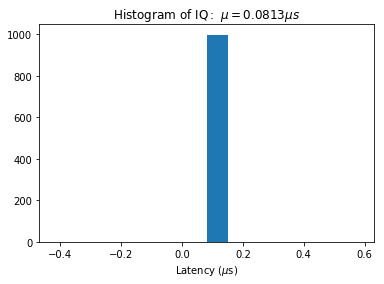

In [281]:
val = (data.endSend-data.beginSend)
plotLatency( val, '/home/vpalladi/Desktop/CMS/PICS/latency/latencySend_'+dataSet+'_'+str(clk_MHz)+'MHz.png', clk_MHz )

In [282]:
import sys
sys.path.append('/home/vpalladi/SW/HGC/sim/HgcTpgSim/python/naming')

from modules.mp7 import *

in_data = []

for i,f in enumerate(data.fileName) :
    if (i)%100 == 0 and i != 0:
        print '>> ',i,'events processed'
    board = MP7()
    board.load_file('/home/vpalladi/FW/MP7/cactusupgrades/projects/hgc/sim/'+dataSet+'/'+f)
    in_data.append( len(board.data_32b[0]) )
        

>>  100 events processed
>>  200 events processed
>>  300 events processed
>>  400 events processed
>>  500 events processed
>>  600 events processed
>>  700 events processed
>>  800 events processed
>>  900 events processed


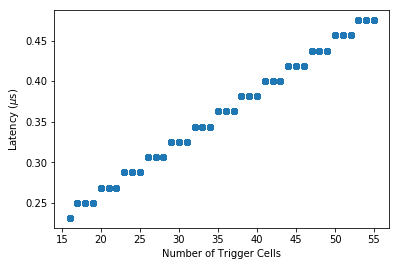

In [283]:

plt.plot(in_data, data.endSend*1/clk_MHz, linestyle='none', marker='o')

plt.xlabel('Number of Trigger Cells')
plt.ylabel('Latency ($\mu$s)')

plt.savefig('/home/vpalladi/Desktop/CMS/PICS/latency/latencyVsDataDepth_'+dataSet+'_'+str(clk_MHz)+'MHz.png', dpi=300)
plt.show()
